Hotel Booking Dataset

Insights we can get from this dataset
1.What is the month with the most guest arrivals?
2.How long do guests tend to stay at the hotel?
3.How many reservations were made by repeated guests?
4.What is the Average Daily Rate (ADR) throughout the year?
5.How many reservations were cancelled out of total?
6.What is the most frequent deposit type for cancelled reservations?
7.Which countries do customers come from?
8.What types of customers are most common in each hotel?
9.What is their preferred meal plan?
10.Which hotel is preferred by adults with children?
11.What is the strongest market segment and distribution channel?

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt,seaborn as sns
import warnings
warnings.filterwarnings('ignore')

We use 
->pandas used for Data Analysis and Data importing from various sources
->

In [8]:
df = pd.read_csv('hotel_bookings.csv')
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [9]:
print(df.shape)

(119390, 32)


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [11]:
#Number of missing values by column

df.isnull().sum().sort_values(ascending = False)


company                           112593
agent                              16340
country                              488
children                               4
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
hotel                                  0
previous_cancellations                 0
days_in_waiting_list                   0
customer_type                          0
adr                                    0
required_car_parking_spaces            0
total_of_special_requests              0
reservation_status                     0
previous_bookings_not_canceled         0
is_repeated_guest                      0
is_canceled                            0
distribution_channel                   0
market_segment                         0
meal                                   0
babies                                 0
adults                                 0
stays_in_week_ni

In [12]:
df.shape

(119390, 32)

In [13]:
#Percentage of missing values by column

round((df.isnull().sum().sort_values(ascending = False) * 100) / len(df), 2)

company                           94.31
agent                             13.69
country                            0.41
children                           0.00
reserved_room_type                 0.00
assigned_room_type                 0.00
booking_changes                    0.00
deposit_type                       0.00
hotel                              0.00
previous_cancellations             0.00
days_in_waiting_list               0.00
customer_type                      0.00
adr                                0.00
required_car_parking_spaces        0.00
total_of_special_requests          0.00
reservation_status                 0.00
previous_bookings_not_canceled     0.00
is_repeated_guest                  0.00
is_canceled                        0.00
distribution_channel               0.00
market_segment                     0.00
meal                               0.00
babies                             0.00
adults                             0.00
stays_in_week_nights               0.00


In [14]:
#Replacing NULL values in company and agent columns with 0

values = {'company': 0, 'agent': 0}

df.fillna(value = values, inplace = True)


#Replacing NULL values in country column with most frecuent value

df['country'].fillna(value = df['country'].mode()[0], inplace = True)


#Removing row affected by NULL values in children column

df.dropna(subset = ['children'], inplace = True)

In [15]:
#Rechecking for NULL values in the data set

df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

In [16]:
# Categorical columns

cat_columns = ['hotel', 'is_canceled', 'meal', 'country', 'market_segment', 'distribution_channel', 'is_repeated_guest', 'reserved_room_type', 'assigned_room_type', 'deposit_type', 'customer_type', 'reservation_status']


# Unique values in each categorical column

print(f"Unique values by categorical columns\n".upper())

for cat_column in cat_columns:
    unique_values = df[cat_column].unique()
    print(f"\n{cat_column}: \n{unique_values}\n")
    print('-' * 70)

UNIQUE VALUES BY CATEGORICAL COLUMNS


hotel: 
['Resort Hotel' 'City Hotel']

----------------------------------------------------------------------

is_canceled: 
[0 1]

----------------------------------------------------------------------

meal: 
['BB' 'FB' 'HB' 'SC' 'Undefined']

----------------------------------------------------------------------

country: 
['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' 'ROU' 'NOR' 'OMN' 'ARG' 'POL' 'DEU'
 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST' 'CZE'
 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR' 'UKR'
 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO' 'ISR'
 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM' 'HRV'
 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY' 'KWT'
 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK' 'IDN' 'LBN' 'PHL' 'SEN' 'SYC'
 'AZE' 'BHR' 'NZL' 'THA' 'DOM' 'MKD' 'MYS' 'ARM' 'JPN' 'LKA' 'CUB' 'CMR'
 'BIH' 'MUS' 'COM' 'SUR' 'UGA' 'BGR' 'CIV' 'JOR' '

In [18]:
#Replacing 'undefined' meal with 'SC'

df['meal'].replace(to_replace = 'Undefined', value = 'SC', inplace = True)

In [17]:
#Rechecking unique values in meal column

df['meal'].unique()

array(['BB', 'FB', 'HB', 'SC', 'Undefined'], dtype=object)

In [19]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119386.000000,119386.000000,119386.000000,119386.000000,119386.000000,119386.000000,119386.000000,119386.000000,119386.000000,119386.000000,119386.000000,119386.000000,119386.000000,119386.000000,119386.000000,119386.000000,119386.000000,119386.000000,119386.000000,119386.000000
mean,0.370395,104.014801,2016.156593,27.165003,15.798553,0.927605,2.500310,1.856390,0.103890,0.007949,0.031913,0.087121,0.137102,0.221131,74.830633,10.775518,2.321227,101.833541,0.062520,0.571340
std,0.482913,106.863286,0.707456,13.605334,8.780783,0.998618,1.908289,0.579261,0.398561,0.097438,0.175770,0.844350,1.497462,0.652315,107.142996,53.944751,17.595011,50.534664,0.245295,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,0.000000,94.590000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,152.000000,0.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [20]:
#Dropping rows with 0 adults

df.drop(df[df['adults'] == 0].index, inplace = True)

In [21]:
#Verification

len(df[df['adults'] == 0])

0

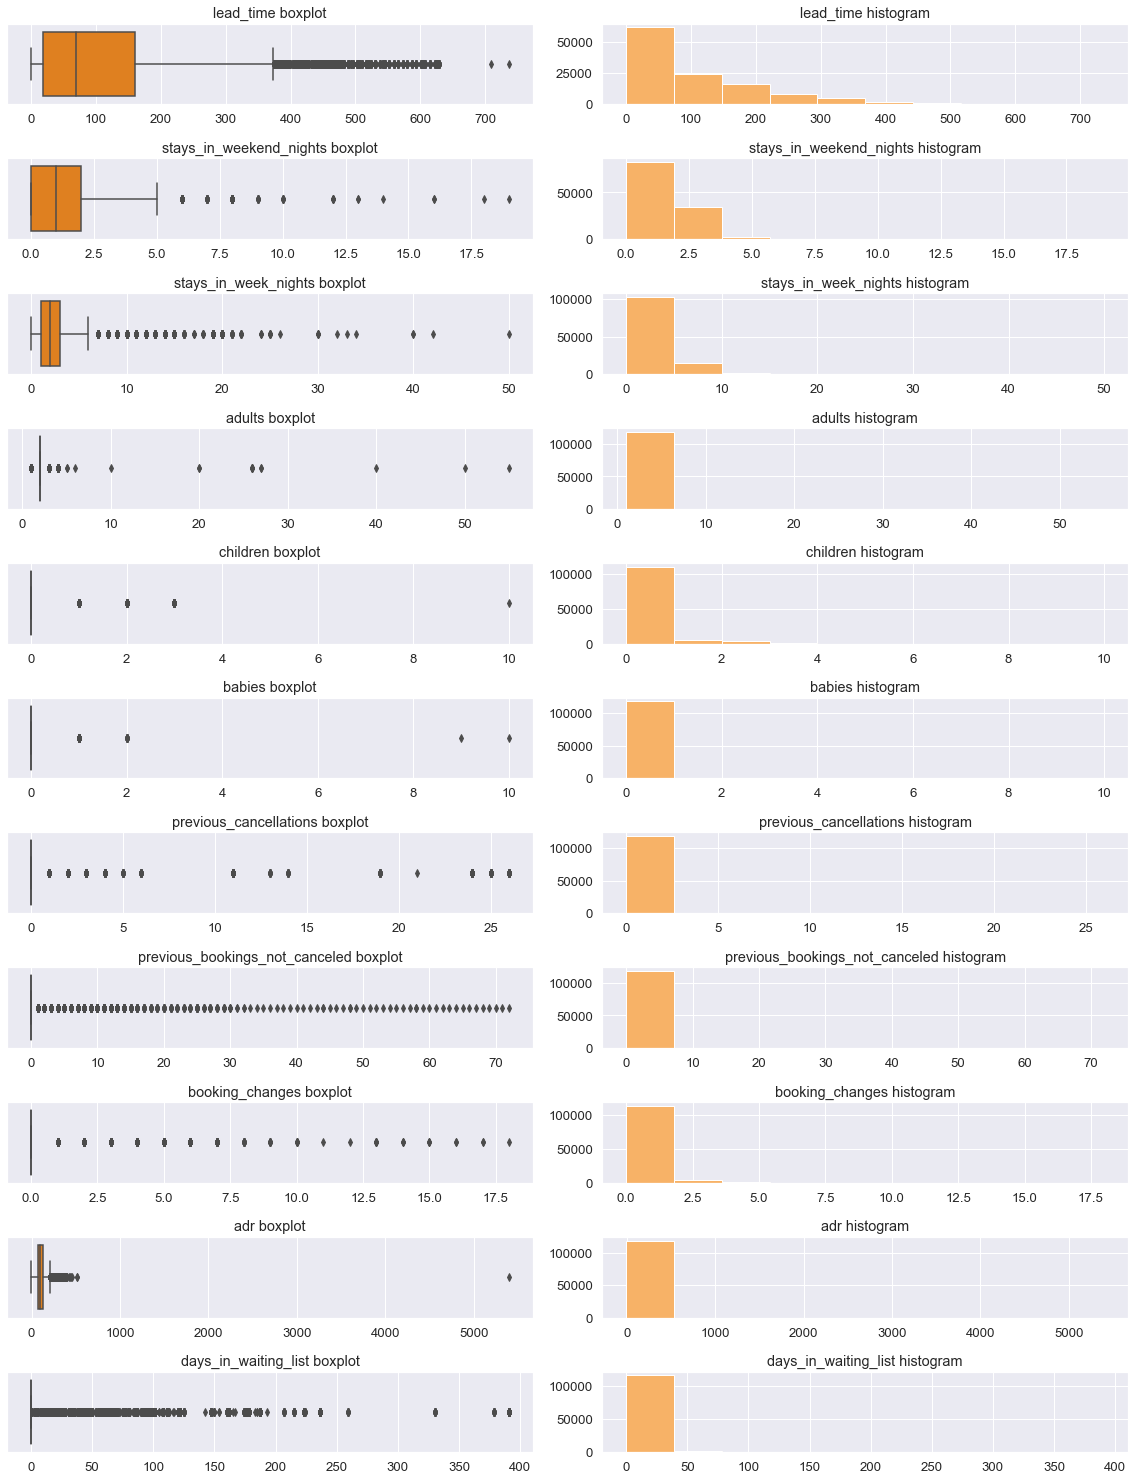

In [23]:
#Columns from `df.describe()` I want to examine

features = ['lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'adr', 'days_in_waiting_list']


#Creating a boxplot and a histogram for outlier detection

n = 1

sns.set_style('darkgrid')
sns.set(font_scale = 1.2)
plt.figure(figsize = (16, 28))

for feature in features:
    plt.subplot(15,2,n)
    sns.boxplot(df[feature], palette = 'autumn').set(xlabel = None)
    plt.title(f'{feature} boxplot')
    n = n + 1
    
    plt.subplot(15,2,n)
    plt.hist(df[feature], color = '#f7b267')
    plt.title(f'{feature} histogram')
    n = n + 1
    plt.tight_layout()

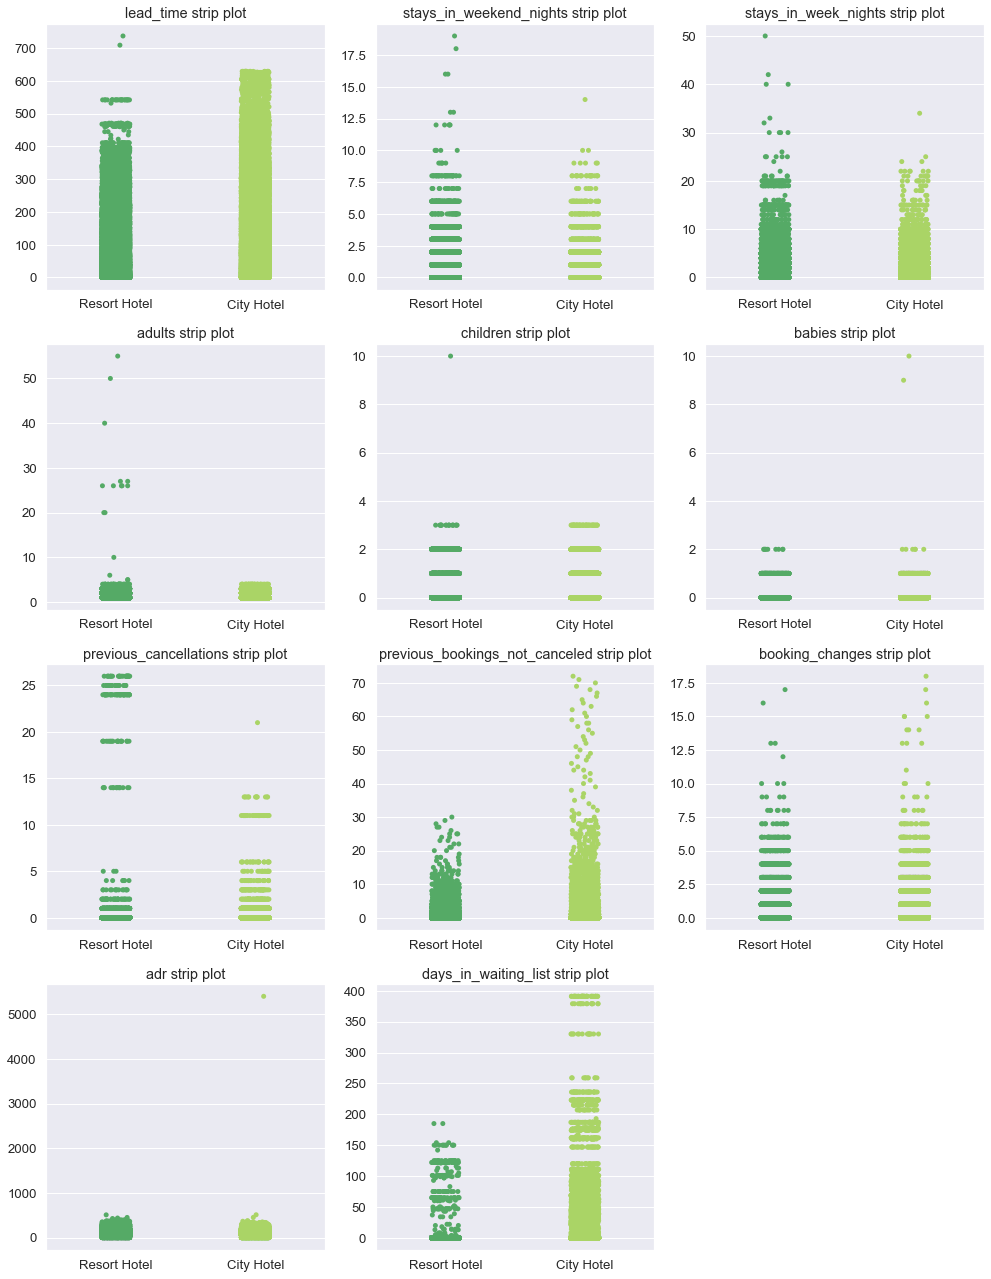

In [24]:
#Creating a stripplot to visualize differences in data distribution between hotels

features = ['lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'adr', 'days_in_waiting_list']

n = 1

sns.set_style('darkgrid')
sns.set(font_scale = 1.2)
plt.figure(figsize = (14, 18))

for feature in features:
    plt.subplot(4,3,n)
    sns.stripplot(x = df['hotel'], y = df[feature], palette = 'summer').set(xlabel = None, ylabel = None)
    plt.title(f'{feature} strip plot')
    n = n + 1
    plt.tight_layout()


In [25]:
# Number of bookings that have more than 10 previous bookings not canceled for resort

num_high_pb = len(df[(df['previous_bookings_not_canceled'] > 10) & (df['hotel'] == 'Resort Hotel')])


# Number of bookings made by companies that had more than 10 previous bookings not canceled for resort

num_companies_high_pb = len(df[(df['previous_bookings_not_canceled'] > 10) & (df['company'] > 0) & (df['hotel'] == 'Resort Hotel')])


# Number of bookings made by private individuals that had more than 10 previous bookings not canceled for resort

num_indiv_high_pb = len(df[(df['previous_bookings_not_canceled'] > 10) & (df['company'] == 0) & (df['hotel'] == 'Resort Hotel')])
# percentage of companies and individuals that had more than 10 previous cancellations for the resort

companies_high_pb_percent = round((num_companies_high_pb / num_high_pb) * 100, 2)
                            
indiv_high_pb_percent = round((num_indiv_high_pb / num_high_pb) * 100, 2)
    
print(f"\nBookings with high values in the previous_bookings_not_canceled column for the Resort Hotel:\n")
print(f"\t{companies_high_pb_percent} % were made by companies.")
print(f"\n\t{indiv_high_pb_percent} % were made by private individuals.")


Bookings with high values in the previous_bookings_not_canceled column for the Resort Hotel:

	70.89 % were made by companies.

	29.11 % were made by private individuals.


In [26]:
# Using loc[] to set new values for outliers

df.loc[df['lead_time']                      > 380, ['lead_time']                   ] = 380
df.loc[df['stays_in_weekend_nights']        > 6, ['stays_in_weekend_nights']       ] = 6
df.loc[df['stays_in_week_nights']           > 10, ['stays_in_week_nights']         ] = 10
df.loc[df['adults']                         > 4, ['adults']                        ] = 4
df.loc[df['children']                       > 8, ['lead_time']                     ] = 0
df.loc[df['babies']                         > 8, ['babies']                        ] = 0
df.loc[df['booking_changes']                > 5, ['booking_changes']               ] = 5
df.loc[df['days_in_waiting_list']           > 0, ['days_in_waiting_list']          ] = 1
df.loc[df['previous_cancellations']         > 0, ['previous_cancellations']        ] = 1
df.loc[df['previous_bookings_not_canceled'] > 0, ['previous_bookings_not_canceled']] = 1


In [27]:
# Dropping row with extreme outlier in adr column

df.drop(df[df['adr'] == 5400].index, inplace = True)

In [28]:
# Counting duplicate data in dataframe

df.duplicated().sum()

32037

In [29]:
# Dropping duplicate rows

df.drop_duplicates(inplace = True)

In [30]:
# Converting datatypes to string

df['arrival_date_year'] = df['arrival_date_year'].astype('str')
df['arrival_date_month'] = df['arrival_date_month'].astype('str')
df['arrival_date_day_of_month'] = df['arrival_date_day_of_month'].astype('str')
df['is_repeated_guest'] = df['is_repeated_guest'].astype('str')
df['is_canceled'] = df['is_canceled'].astype('str')
df['previous_cancellations'] = df['previous_cancellations'].astype('str')
df['previous_bookings_not_canceled'] = df['previous_bookings_not_canceled'].astype('str')

In [31]:
# Creating arrival_date column and changing its datatype to datetime

df['arrival_date'] = df['arrival_date_day_of_month'] + '-' + df['arrival_date_month'] + '-' + df['arrival_date_year']
df['arrival_date'] = pd.to_datetime(df['arrival_date'], errors = 'coerce')

In [32]:
# Combining children and babies together as kids

df['kids'] = df['children'] + df['babies']

In [33]:
# Creating total_members column

df['total_members'] = df['kids'] + df['adults']

In [34]:
# Total nights per booking

df['total_nights'] = df['stays_in_week_nights'] + df['stays_in_weekend_nights']

In [35]:
# Changing arrival_date_month column to show month number instead of month name

import datetime as dt

df['arrival_date_month'] = df['arrival_date'].dt.month

In [36]:
# Creating family column

df['family'] = np.where(df['kids'] > 0, '1', '0')

In [37]:
# Dataset with confirmed bookings only

confirmed_bookings = df[df['is_canceled'] == '0']

In [38]:
# Dataset with canceled bookings only

canceled_bookings = df[df['is_canceled'] == '1']

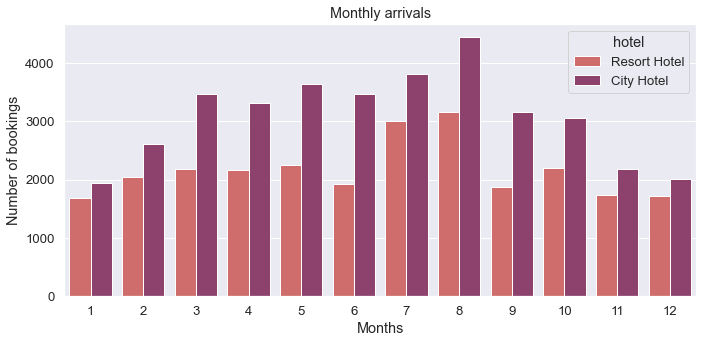

In [39]:
plt.figure(figsize = (10, 5))

sns.countplot(x = 'arrival_date_month', data = confirmed_bookings, hue = 'hotel', palette = 'flare')
plt.title('Monthly arrivals', )
plt.xlabel('Months')
plt.ylabel('Number of bookings')

plt.tight_layout()

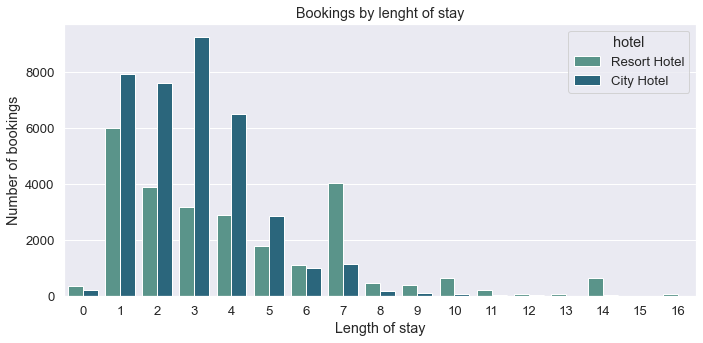

In [40]:
plt.figure(figsize = (10, 5))

sns.countplot(x = 'total_nights', data = confirmed_bookings, hue = 'hotel', palette = 'crest')
plt.title('Bookings by lenght of stay')
plt.xlabel('Length of stay')
plt.ylabel('Number of bookings')

plt.tight_layout()

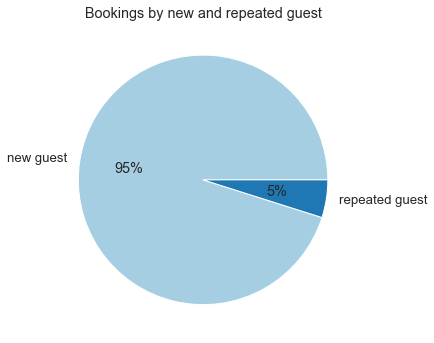

In [41]:
plt.figure(figsize = (10, 5))

data = confirmed_bookings['is_repeated_guest'].value_counts()
colors = sns.color_palette('Paired')
labels = ['new guest', 'repeated guest']

plt.pie(data, labels = labels, autopct = '%.0f%%', colors = colors)
plt.title('Bookings by new and repeated guest')

plt.tight_layout()

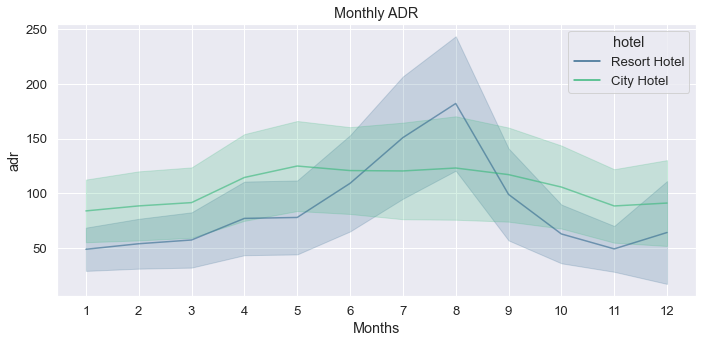

In [42]:
plt.figure(figsize = (10, 5))

months = confirmed_bookings['arrival_date_month'].unique()

sns.lineplot(x = 'arrival_date_month', y = 'adr', hue = 'hotel', data = confirmed_bookings, ci = 'sd', palette = 'viridis', alpha = 0.6)
plt.title('Monthly ADR')
plt.xlabel('Months')
plt.xticks(ticks = [m for m in months])

plt.tight_layout()

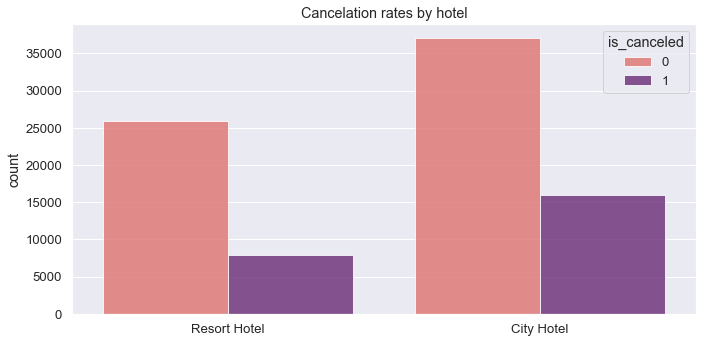

In [43]:
plt.figure(figsize = (10, 5))

sns.countplot(x = 'hotel', data = df, hue = 'is_canceled', palette = 'magma_r', alpha = 0.8).set(xlabel = None)
plt.title('Cancelation rates by hotel')

plt.tight_layout()

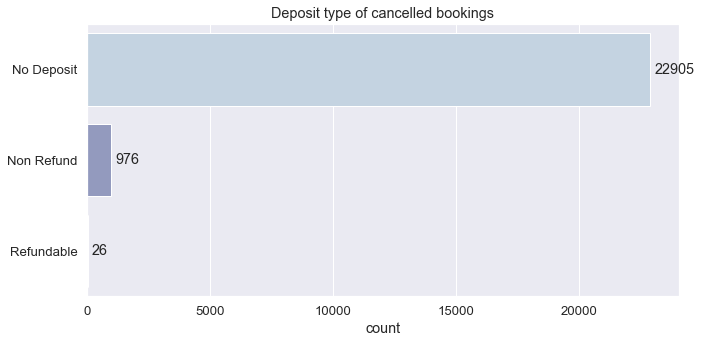

In [44]:
fig, ax = plt.subplots(figsize = (10, 5))

sns.countplot(ax = ax, y = 'deposit_type', data = canceled_bookings, orient = "h" ,palette = 'BuPu').set(ylabel = None)
ax.bar_label(ax.containers[0], padding = 4)
plt.title('Deposit type of cancelled bookings')

plt.tight_layout()

<Figure size 1008x360 with 0 Axes>

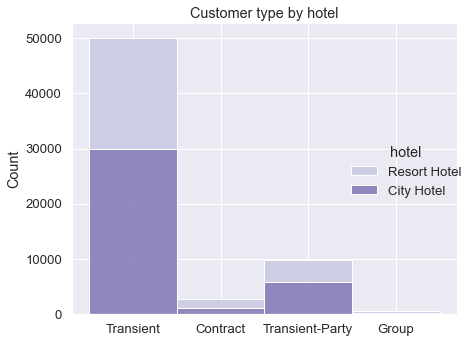

In [46]:
plt.figure(figsize = (14, 5))

sns.displot(confirmed_bookings, x = 'customer_type', hue = 'hotel', multiple = 'stack', palette = 'Purples', alpha = 0.8).set(xlabel = None)
plt.title('Customer type by hotel')

plt.tight_layout()

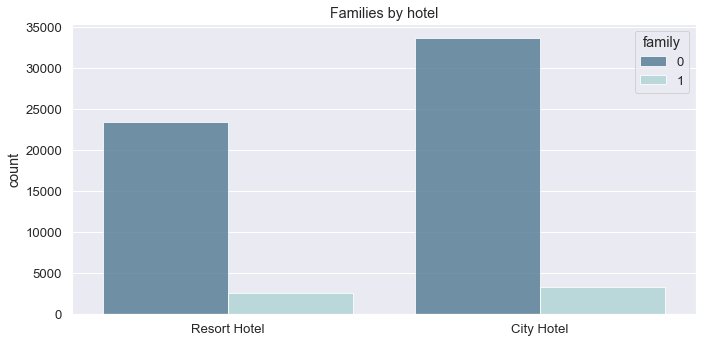

In [48]:
plt.figure(figsize = (10, 5))

palette = ["#457b9d", "#a8dadc"]

sns.countplot(data = confirmed_bookings, x = 'hotel', hue = 'family', palette = palette, alpha = 0.8).set(xlabel = None)
plt.title('Families by hotel')

plt.tight_layout()

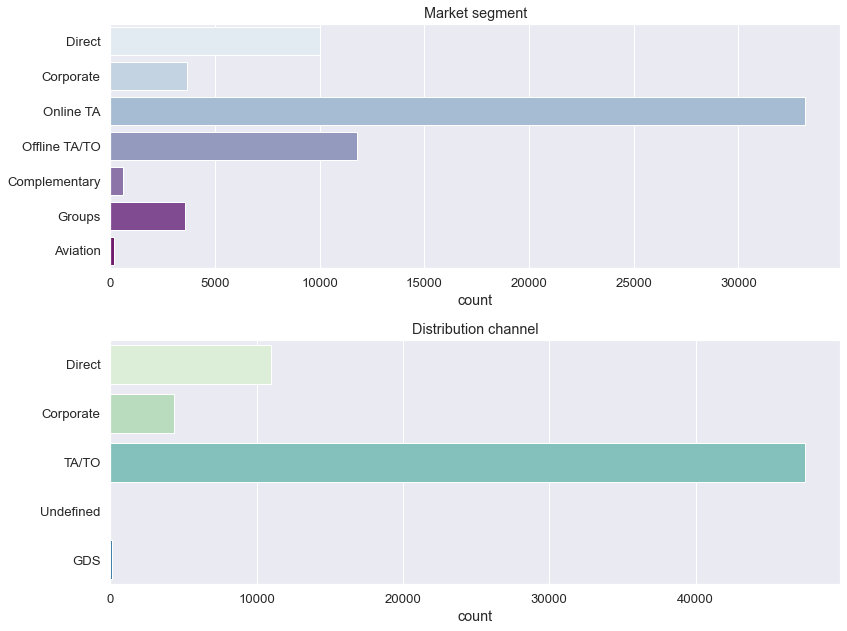

In [49]:
plt.figure(figsize = (12, 9))

plt.subplot(2,1,1)
sns.countplot(data = confirmed_bookings, y = 'market_segment', orient = "h" ,palette = 'BuPu').set(ylabel = None)
plt.title('Market segment')

plt.subplot(2,1,2)
sns.countplot(data = confirmed_bookings, y = 'distribution_channel', orient = "h" ,palette = 'GnBu').set(ylabel = None)
plt.title('Distribution channel')

plt.tight_layout()